In [606]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the Data

In [607]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [608]:
df.shape

(200, 5)

In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [610]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Preprocessing

## Visualizations

### Univariate Analysis-1 (Pie Chart)

In [611]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

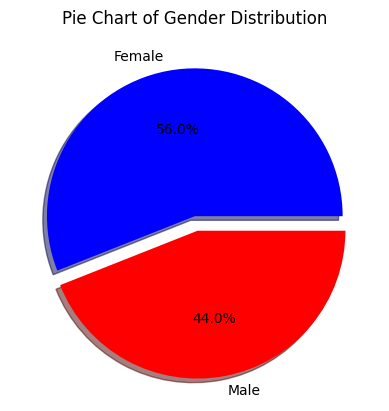

In [612]:
plt.pie(df['Gender'].value_counts(),[0,0.1],labels=['Female','Male'],autopct='%1.1f%%',shadow=True,colors=['blue','red'])
plt.title('Pie Chart of Gender Distribution')
plt.show()

### Univariate Analysis-2 (Bar Plot)

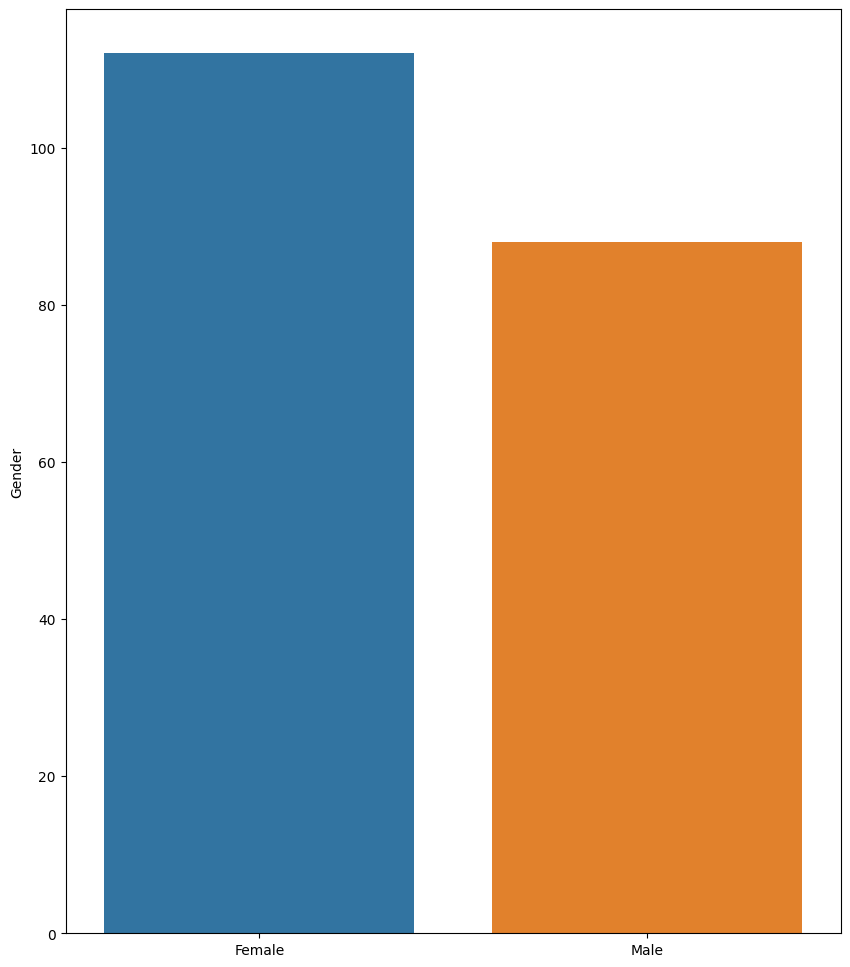

In [613]:
plt.figure(figsize=(10,12))
sns.barplot(x=df['Gender'].value_counts().index,y=df['Gender'].value_counts())
plt.show()

### Bivariate Analysis-1 (Joint Plot)

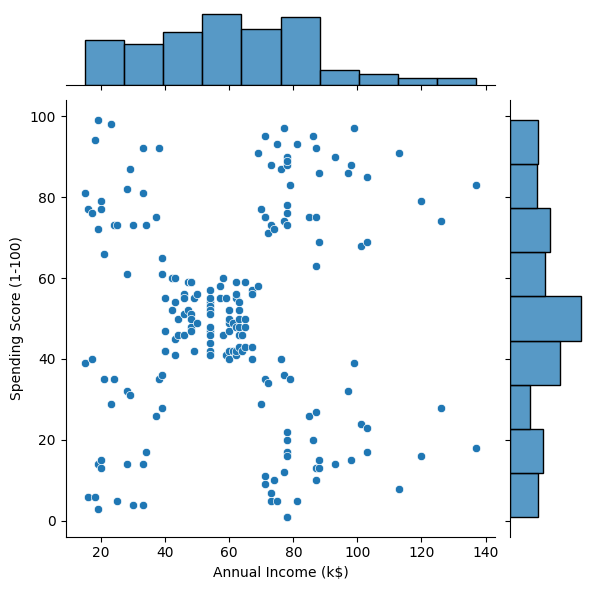

In [614]:
sns.jointplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.show()

### Bivariate Analysis-2 (Line Plot)

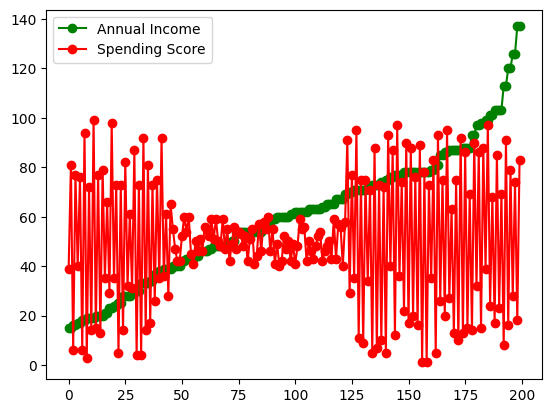

In [615]:
line1=df['Annual Income (k$)']
line2=df['Spending Score (1-100)']
plt.plot(line1,'o-g')
plt.plot(line2,'o-r')
plt.legend(['Annual Income','Spending Score'])
plt.show()

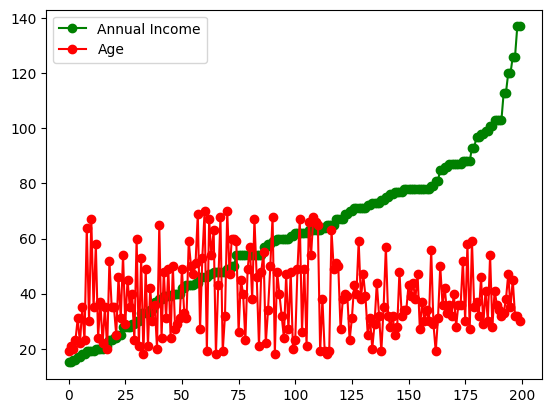

In [616]:
line1=df['Annual Income (k$)']
line2=df['Age']
plt.plot(line1,'o-g')
plt.plot(line2,'o-r')
plt.legend(['Annual Income','Age'])
plt.show()

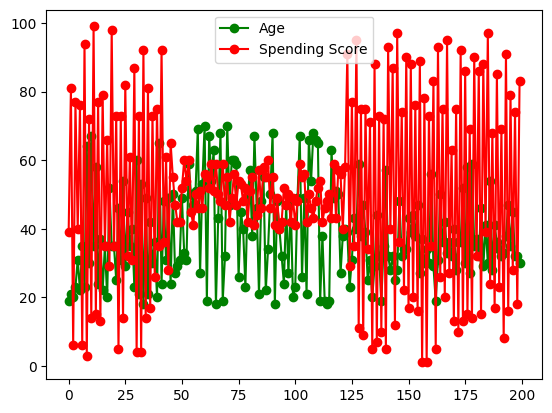

In [617]:
line1=df['Age']
line2=df['Spending Score (1-100)']
plt.plot(line1,'o-g')
plt.plot(line2,'o-r')
plt.legend(['Age','Spending Score'])
plt.show()

### Multivariate Analysis-1 (Pair Plot)

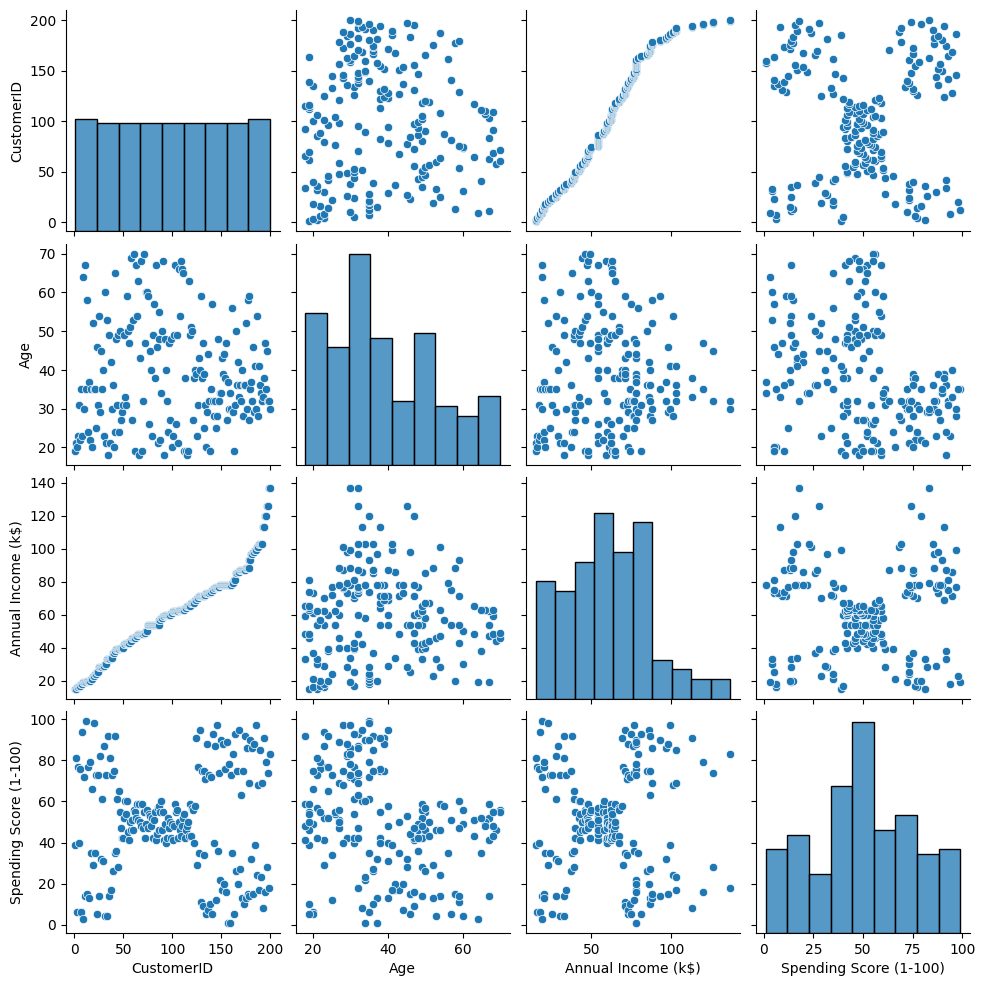

In [618]:
sns.pairplot(df)
plt.show()

### Multivariate Analysis-2 (Heat map)

<ipython-input-619-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


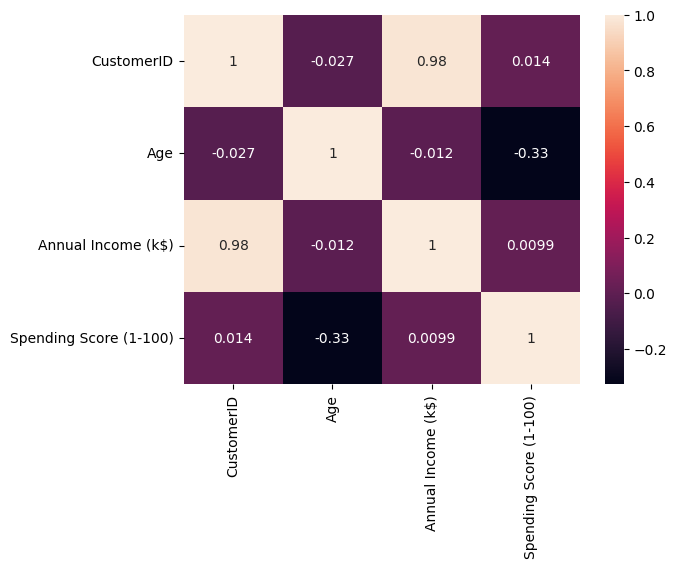

In [619]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Label Encoding


In [620]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Dropping unwanted column

In [621]:
df.drop(columns=['CustomerID'],inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Checking for outliers and handling them

<Axes: >

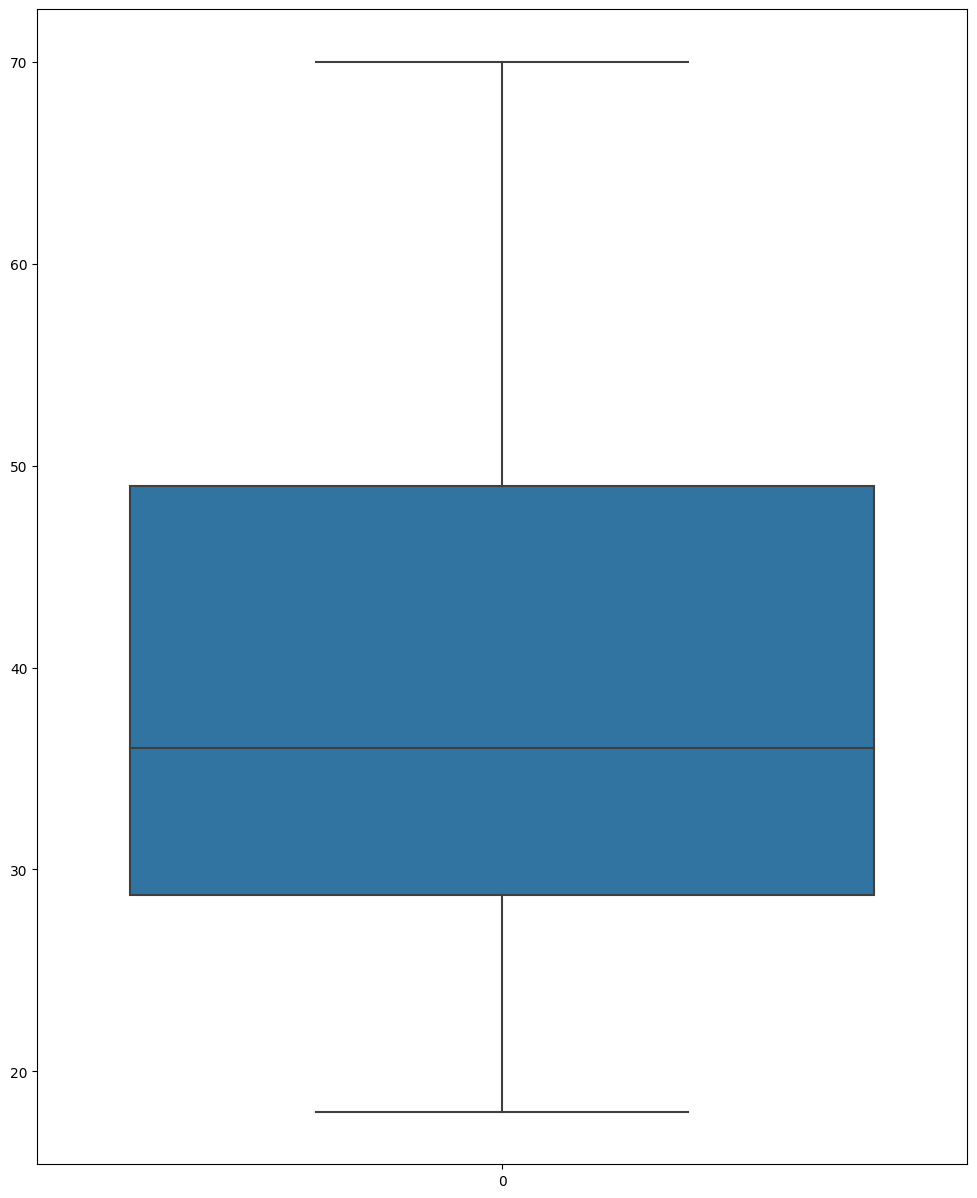

In [622]:
plt.figure(figsize=(12,15))
sns.boxplot(df['Age'])

<Axes: >

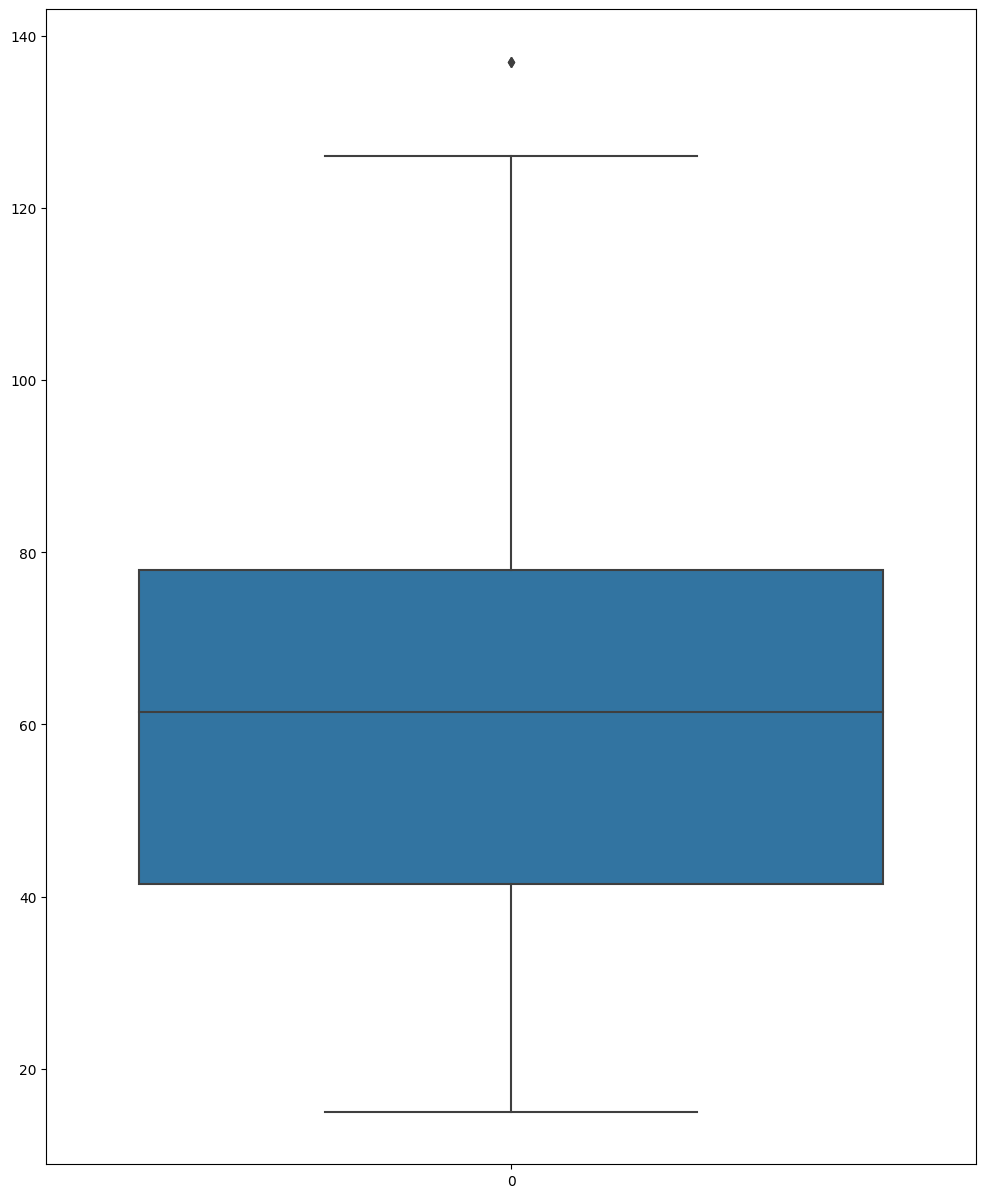

In [623]:
plt.figure(figsize=(12,15))
sns.boxplot(df['Annual Income (k$)'])

In [624]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR
df['Annual Income (k$)'] = np.where((df['Annual Income (k$)']>upper_limit) | (df['Annual Income (k$)']<lower_limit),df['Annual Income (k$)'].median(),df['Annual Income (k$)'])

<Axes: >

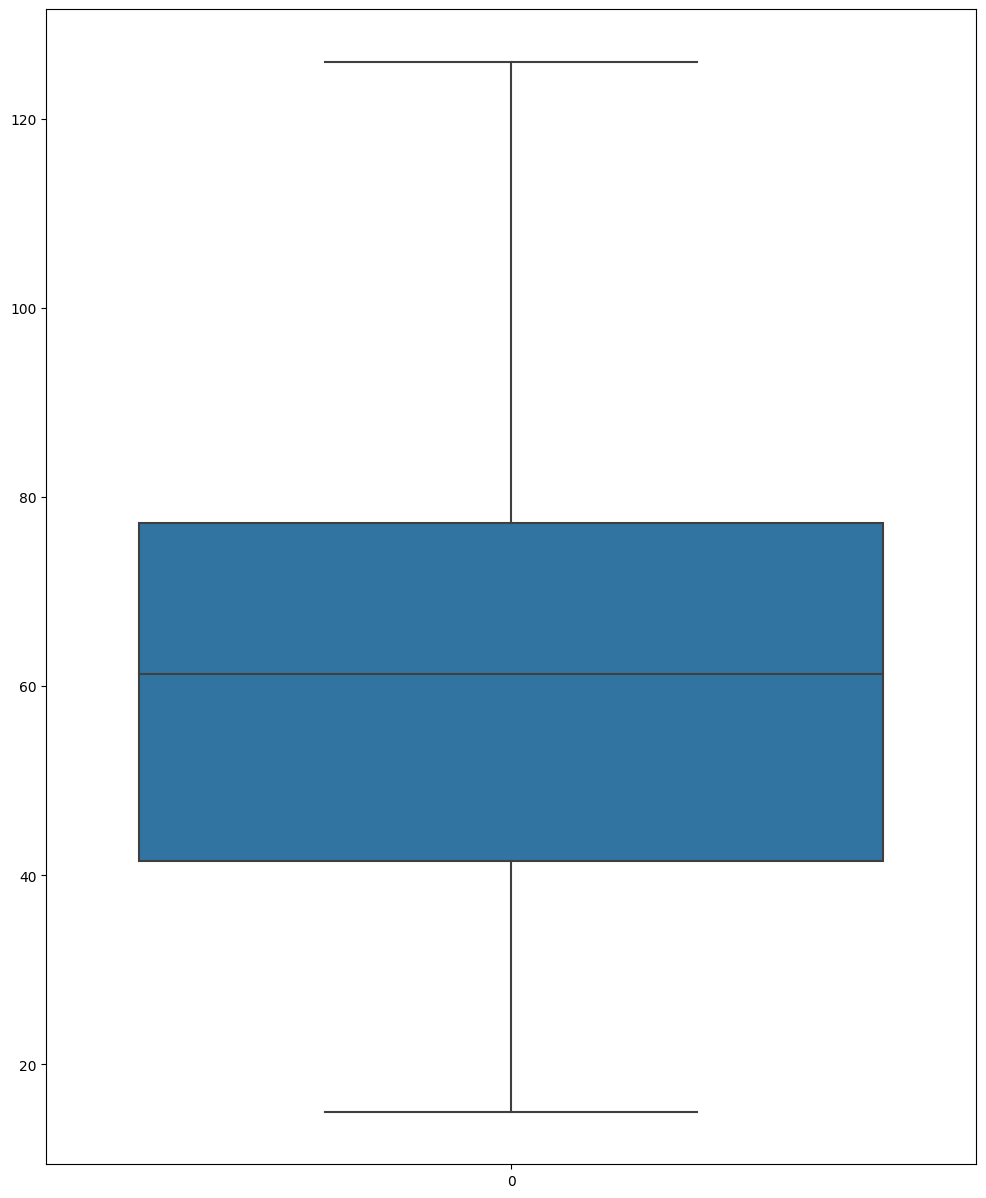

In [625]:
plt.figure(figsize=(12,15))
sns.boxplot(df['Annual Income (k$)'])

<Axes: >

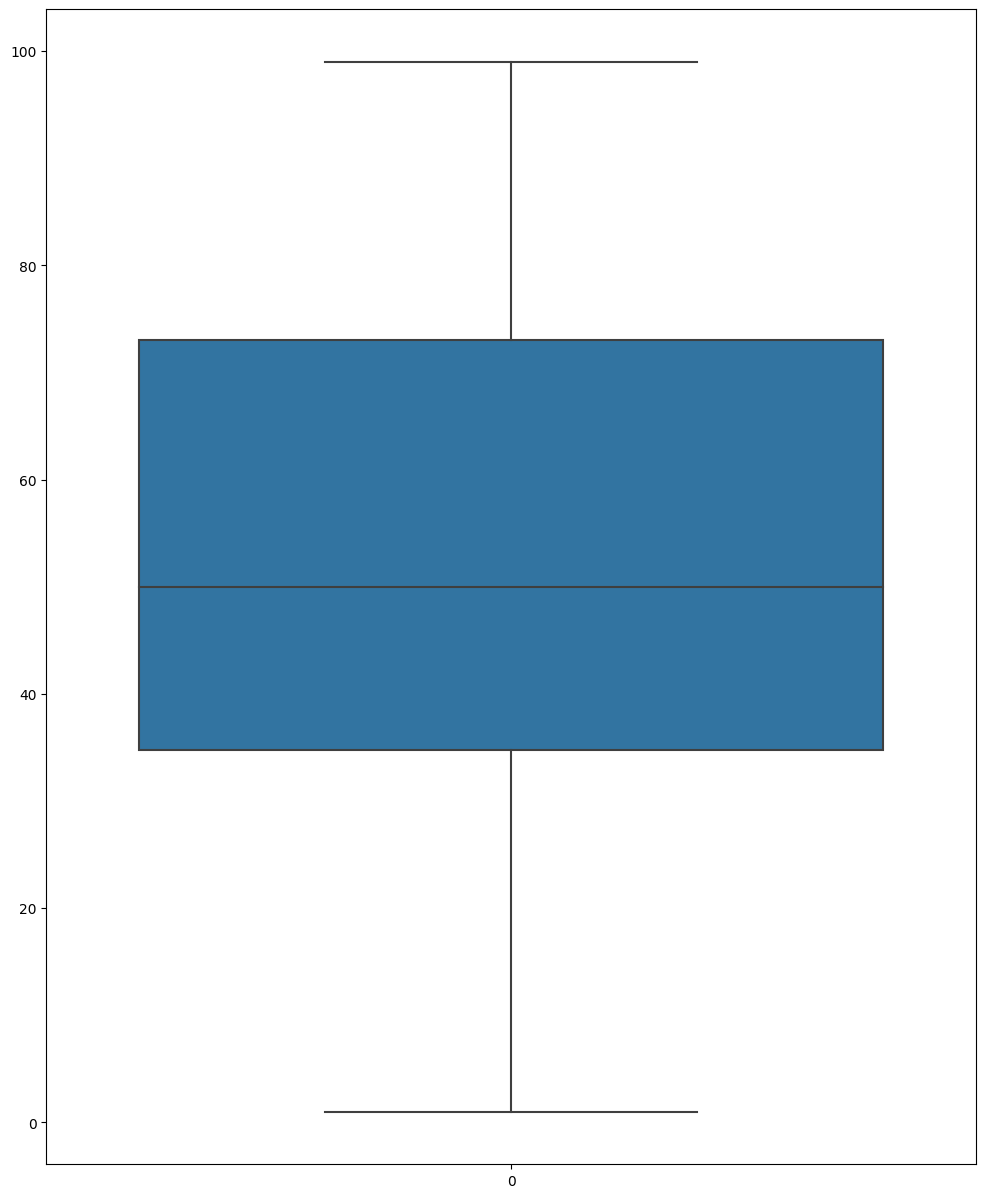

In [626]:
plt.figure(figsize=(12,15))
sns.boxplot(df['Spending Score (1-100)'])

# Model Building (K-Means ++ Clustering)

In [627]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [628]:
from sklearn import cluster

In [629]:
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [630]:
error

[297063.67500000005,
 201152.1081841432,
 139326.23321730684,
 100349.31619915173,
 71452.15398255127,
 54455.93879921248,
 48690.46594333272,
 44049.34418034487,
 39872.05312036622,
 35841.183878126976]

Text(0, 0.5, 'error')

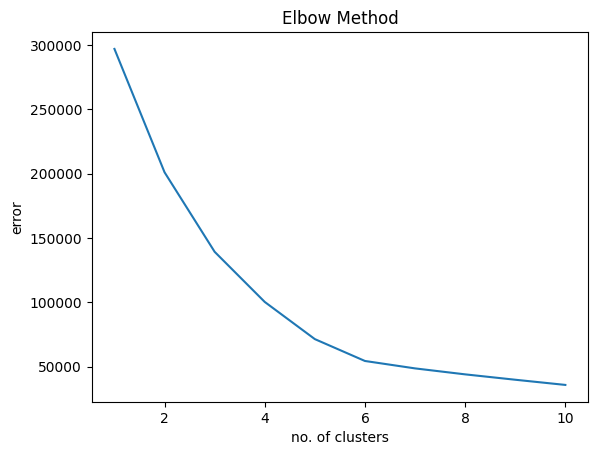

In [631]:
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('error')

In [632]:
km_model = cluster.KMeans(n_clusters=5, init = 'k-means++', random_state=0)

In [633]:
km_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [634]:
pred=km_model.predict(df)
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

# Testing with random observations

In [635]:
km_model.predict([[1,25,54,46]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [636]:
km_model.predict([[0,18,81,92]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [637]:
km_model.predict([[0,17,12,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [638]:
km_model.predict([[1,55,48,31]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [639]:
km_model.predict([[1,35,127,28]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [640]:
km_model.predict([[0,47,49,115]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

# Evaluation

In [641]:
from sklearn.metrics import silhouette_score

In [642]:
silhouette_score(df, km_model.labels_, metric='euclidean')

0.4458441722923995

# Cluster diagram

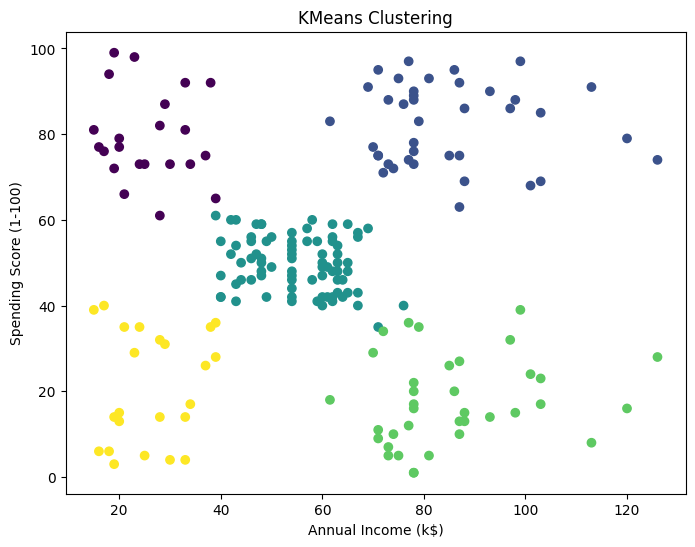

In [643]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=km_model.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering')
plt.show()